# Garment Worker Productivity Prediction

## 1. Data Understanding and Preprocessing 
###  Dataset Exploration

In the cell below, we:

* Importing all the necessary libraries.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from itertools import combinations_with_replacement

In the cell below, `garments_worker_productivity.csv` as `df`:

In [2]:
# Loading the data
df = pd.read_csv('garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Now you want to get familiar with the data. This step includes:

* Understanding the dimensionality of your dataset

* Investigating what type of data it contains, and the data types used to store it

* Discovering how missing values are encoded, and how many there are

* Getting a feel for what information it does and doesn't contain

* check the existing columns

In [3]:
#Understanding the dimensionality of your dataset
df.shape

(1197, 15)

In [4]:
#Investigating what type of data it contains, and the data types used to store it
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [5]:
#Discovering how missing values are encoded, and how many there are
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [6]:
#check the existing columns
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

### Data Cleaning

In this cell we see the descriptive statistics for numerical columns, such as mean, standard deviation, min, and max.

In [7]:
#descriptive statistics for numerical columns, such as mean, standard deviation, min, and max.
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


* Look out for missing values and try to figure out how we can handle them

In [8]:
# Checking null values
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

What do we want to do about these missing values?

Recall that there are two general strategies for dealing with missing values:

* Fill in missing values (either using another value from the column, e.g. the mean or mode, or using some other value like "Unknown")

* Drop rows with missing values

The whole dataset has 1197 rows and the highest column having missing values is `wip` which has 506 missing values which is about 42.27% of our data.

we see that the null values have a very high impact on our data set therefore we decide to fill in missing values with a placeholder i.e the median.

Now, implement the strategy to fill in missing values using code.

In [9]:
# Calculate the median of the 'wip' column and fill missing values
if 'wip' in df.columns:
    wip_median = df['wip'].median()
    df['wip'].fillna(wip_median, inplace=True)

# Verify that there are no missing values in the 'wip' column after the operation
missing_values_after_fill = df['wip'].isnull().sum()
missing_values_after_fill

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

we see that there are no miising values all of them have been filled so we go ahead and drop  duplicate rows as they are of no essence and doesn't contain any much vivid information, detect and manage outliers

In [11]:
df.drop(columns='day', axis=1, inplace=True)

In [12]:
df = df.drop_duplicates()

In [13]:
def categorical_columns(self, df):
    """Returns a list of categorical columns in the dataframe."""
    return df.select_dtypes(include=['object', 'category']).columns
    
def numerical_columns(self, df):
    """Returns a list of numerical columns in the dataframe."""
    return df.select_dtypes(include=[np.number]).columns

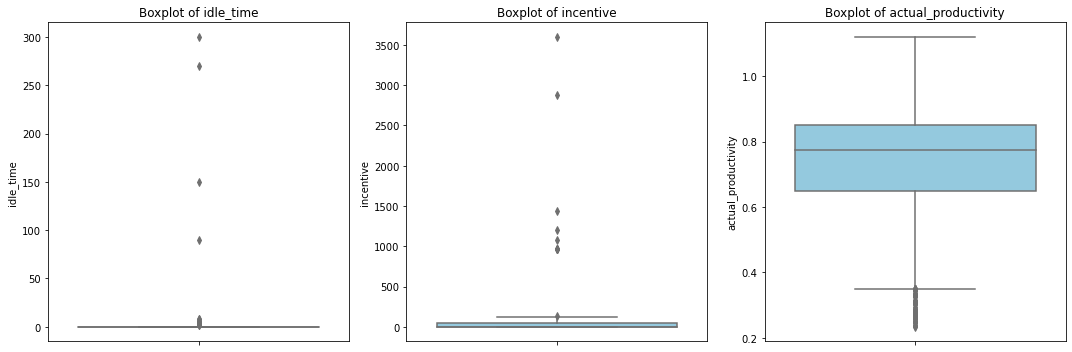

In [14]:
# Function to plot outliers using boxplots
def plot_outliers(df, columns):
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)  # Create subplots for each column
        sns.boxplot(y=df[column], color='skyblue')
        plt.title(f"Boxplot of {column}")
        plt.ylabel(column)
    plt.tight_layout()
    plt.show()

# Columns to visualize
columns_to_plot = ['idle_time', 'incentive', 'actual_productivity']

# Call the function
plot_outliers(df, columns_to_plot)

From the boxplots above we evidently see the presence of outliers in some of the columns so we go ahead and manage them by the use of IQR Method.

In [15]:
# Function to detect and manage outliers using IQR
def manage_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap values outside the range
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Columns to process
columns_to_clean = ['idle_time', 'incentive', 'actual_productivity']

# Apply the function
df = manage_outliers(df, columns_to_clean)

we now plot the columns again to be sure the outliers have been well managed.

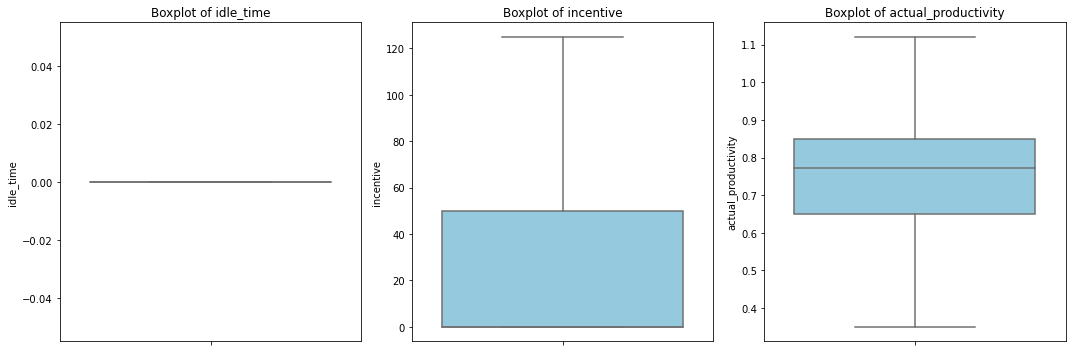

In [16]:
# Function to plot outliers using boxplots
def plot_outliers(df, columns):
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)  # Create subplots for each column
        sns.boxplot(y=df[column], color='skyblue')
        plt.title(f"Boxplot of {column}")
        plt.ylabel(column)
    plt.tight_layout()
    plt.show()

# Columns to visualize
columns_to_plot = ['idle_time', 'incentive', 'actual_productivity']

# Call the function
plot_outliers(df, columns_to_plot)

From the boxplots above,it is clear that all the outliers are well managed.

### Feature Engineering
For categorical features (e.g., quarter, department), Perform one-hot encoding.

In [17]:
# Clean the data
df['department'] = df['department'].str.strip().str.lower()

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['quarter', 'department'], drop_first=False)
df.head()

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing
0,1/1/2015,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,0,0,0,0,0,1
1,1/1/2015,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,1,0,0,0,0,1,0
2,1/1/2015,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,0,0,1
3,1/1/2015,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,0,0,1
4,1/1/2015,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,0,0,0,0,0,1


 Extract useful date features such as month and day_of_week

In [18]:
# Convert the date column to a pandas datetime object
df['date'] = pd.to_datetime(df['date'])

# Extract useful features
df['month'] = df['date'].dt.month  # Extract month (1-12)
df['day_of_week'] = df['date'].dt.dayofweek  # Extract day of the week (0=Monday, 6=Sunday)
#df['day_name'] = df['date'].dt.day_name()  # Extract day name (e.g., Monday
df = df.drop(columns=['date'])
df

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,month,day_of_week
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,0,0,0,0,0,1,1,3
1,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,1,0,0,0,0,1,0,1,3
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,0,0,1,1,3
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,0,0,1,1,3
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,0,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333,0,1,0,0,0,1,0,3,2
1193,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625,0,1,0,0,0,1,0,3,2
1194,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625,0,1,0,0,0,1,0,3,2
1195,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889,0,1,0,0,0,1,0,3,2


### Feature Scaling
Using StandardScaler scale numerical features (e.g., smv, over_time) for consistency 
in model training. 

In [19]:
# Initialize the scaler
scaler = StandardScaler()

# Select numerical columns to scale
columns_to_scale = ['smv', 'over_time', 'incentive']

# Scale the numerical features
df_scaled = df.copy()  # To keep original data intact
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df_scaled

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,month,day_of_week
0,8,0.80,1.014552,1108.0,0.750589,2.259493,0.0,0,0,59.0,0.940725,1,0,0,0,0,0,1,1,3
1,1,0.75,-1.016778,1039.0,-1.077682,-0.846671,0.0,0,0,8.0,0.886500,1,0,0,0,0,1,0,1,3
2,11,0.80,-0.333878,968.0,-0.271092,0.738107,0.0,0,0,30.5,0.800570,1,0,0,0,0,0,1,1,3
3,12,0.80,-0.333878,968.0,-0.271092,0.738107,0.0,0,0,30.5,0.800570,1,0,0,0,0,0,1,1,3
4,6,0.80,0.990783,1170.0,-0.790895,0.738107,0.0,0,0,56.0,0.800382,1,0,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,-1.111853,1039.0,-1.077682,-0.846671,0.0,0,0,8.0,0.628333,0,1,0,0,0,1,0,3,2
1193,8,0.70,-1.020434,1039.0,-1.077682,-0.846671,0.0,0,0,8.0,0.625625,0,1,0,0,0,1,0,3,2
1194,7,0.65,-1.020434,1039.0,-1.077682,-0.846671,0.0,0,0,8.0,0.625625,0,1,0,0,0,1,0,3,2
1195,9,0.75,-1.111853,1039.0,-0.826743,-0.846671,0.0,0,0,15.0,0.505889,0,1,0,0,0,1,0,3,2


In [20]:
df_scaled.to_csv("cleaned_data.csv", index=False)

## 2. Exploratory Data Analysis (EDA)

### Target Variable Analysis: 

○ Analyze the distribution of actual_productivity to understand its spread.

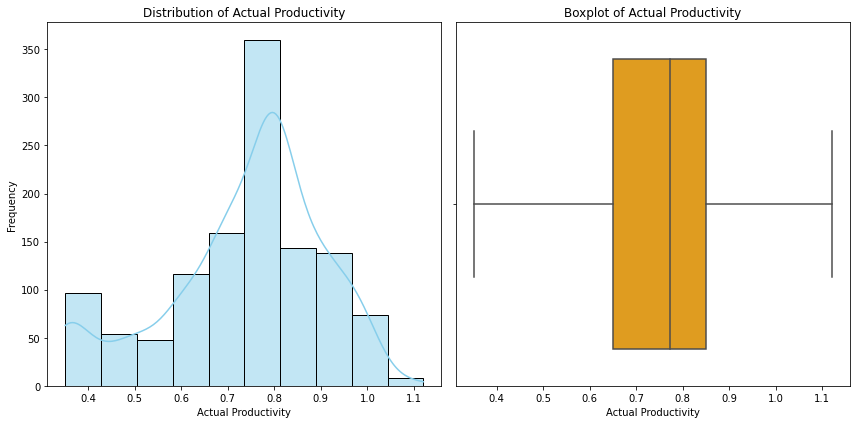

Summary Statistics for Actual Productivity:
count    1197.000000
mean        0.737397
std         0.168772
min         0.350389
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64


In [21]:
# Analyze the distribution
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_scaled['actual_productivity'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_scaled['actual_productivity'], color='orange')
plt.title('Boxplot of Actual Productivity')
plt.xlabel('Actual Productivity')

plt.tight_layout()
plt.show()

# Summary statistics
summary_stats = df_scaled['actual_productivity'].describe()
print("Summary Statistics for Actual Productivity:")
print(summary_stats)

Histogram:

* Shows how `actual_productivity` values are distributed (e.g., peaks indicating common values). From this we see that the `actual_productivity` is normally distributed suggesting balanced productivity values.

Boxplot:

* Highlights outliers (if any) as points outside the whiskers.From the boxplot we see there are no outliers in the column

* Displays the interquartile range (IQR), median, and spread.

### Feature Relationships: 

○ we use scatter plots and box plots to visualize the relationships between 
actual_productivity and features like over_time, incentive, and smv. 


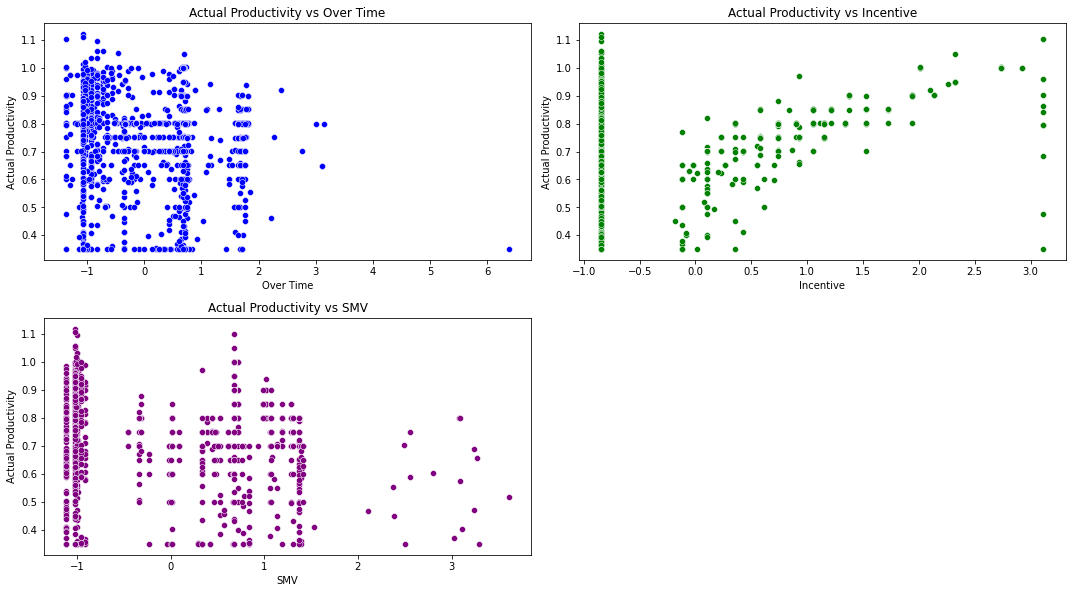

In [22]:
# Set up the plotting grid
plt.figure(figsize=(15, 12))

# Scatter plots
plt.subplot(3, 2, 1)
sns.scatterplot(x='over_time', y='actual_productivity', data=df_scaled, color='blue')
plt.title('Actual Productivity vs Over Time')
plt.xlabel('Over Time')
plt.ylabel('Actual Productivity')

plt.subplot(3, 2, 2)
sns.scatterplot(x='incentive', y='actual_productivity', data=df_scaled, color='green')
plt.title('Actual Productivity vs Incentive')
plt.xlabel('Incentive')
plt.ylabel('Actual Productivity')

plt.subplot(3, 2, 3)
sns.scatterplot(x='smv', y='actual_productivity', data=df_scaled, color='purple')
plt.title('Actual Productivity vs SMV')
plt.xlabel('SMV')
plt.ylabel('Actual Productivity')

# Adjust layout
plt.tight_layout()
plt.show()

The scatter plots provide a visual representation of the relationships between actual_productivity (y-axis) and the features over_time, incentive, and smv (x-axis). Here’s an interpretation of each:

1. Actual Productivity vs Over Time

Observation:

There is a dense cluster of points between -1 and 1 on the over_time axis.
A few points extend beyond 1, suggesting outliers or sparsely distributed values for higher over_time.

Explanation:
The clustering near -1 indicates that many values of over_time were around the mean (or one standard deviation below the mean) before standardization.

The data shows no clear linear relationship between actual_productivity and over_time. The scatter is fairly random.

2. Actual Productivity vs Incentive

Observation:

The points show an upward trend; as incentive increases, actual_productivity tends to increase as well.
A concentration of points is present near incentive = 0, indicating a lot of employees received no or minimal incentive.

Explanation:

The positive correlation suggests that higher incentives lead to increased productivity.
The cluster near 0 might represent employees or cases with no incentive, and their productivity levels vary widely.

3. Actual Productivity vs SMV

Observation:

There are clusters of points around -1, 0, 1, and beyond, with no clear trend or strong correlation between smv and actual_productivity.
The high concentration near -1 indicates many values close to the mean after standardization.

Explanation:

SMV (Standard Minute Value) might not have a direct linear relationship with actual_productivity.
The clustering around specific values suggests that smv might take on specific discrete values (e.g., categories).

* General Observations

Clustering at -1: The clustering in the over_time and smv plots suggests that these features are heavily influenced by standardization, with values concentrated near the mean.

Correlation: The strongest apparent relationship is between incentive and actual_productivity, as shown by the upward trend.

### Correlation Analysis: 

○ A correlation heatmap to see relationships between numerical features 
and the target variable


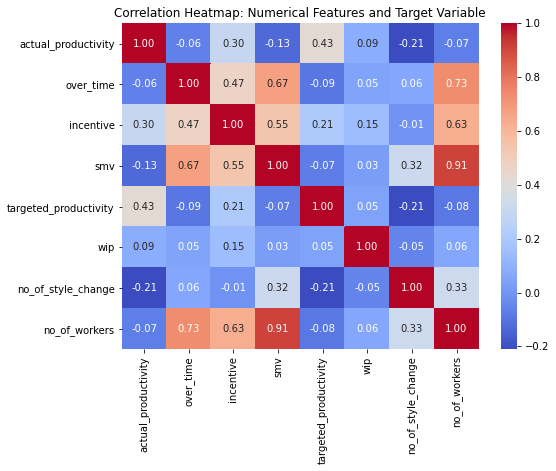

In [23]:
# Calculate correlation matrix
numerical_features = ['actual_productivity', 'over_time', 'incentive', 'smv', 'targeted_productivity','wip','no_of_style_change','no_of_workers']
correlation_matrix = df_scaled[numerical_features].corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap: Numerical Features and Target Variable")
plt.show()

The heatmap shows the pairwise correlation coefficients between numerical features in the dataset, including `actual_productivity`, and helps identify linear relationships. Here is a breakdown:

Key Observations:

* Diagonal Values:

The diagonal values are all 1.00, as each feature is perfectly correlated with itself.

* Target Variable (actual_productivity):

`incentive` (0.30): Positive correlation, indicating higher incentives tend to improve productivity.

`targeted_productivity` (0.43): Moderate positive correlation, suggesting a relationship between planned and actual productivity.

Other Features (`over_time`, `smv`, etc.): Weak correlations, suggesting these may not significantly impact actual_productivity in a linear manner.

* High Correlations Among Features:

`smv` and `no_of_workers` (0.91): Very strong positive correlation, indicating redundancy or multicollinearity. Both features likely scale together.

`smv` and `over_time` (0.67): Positive correlation; larger smv may require more over_time.

`no_of_workers` and `over_time` (0.73): Larger workforce may lead to increased overtime.

* Negative Correlations:

`actual_productivity` and `no_of_style_change` (-0.21): Negative relationship, as frequent style changes may disrupt productivity.

`actual_productivity` and `smv` (-0.13): Weak negative correlation, suggesting complexity (higher SMV) might slightly reduce productivity.


### EDA Summary
1. Scatter Plots
* Over Time vs. Actual Productivity:

Weak relationship observed.\: Standardized Over Time values concentrate around -1, likely due to limited variability in data or outliers.

This feature might not significantly affect the target unless explored further (e.g., non-linear modeling).

* Incentive vs. Actual Productivity:

Positive trend: Higher incentives generally correspond to higher productivity.

Indicates this feature is likely important for predicting productivity.

* SMV vs. Actual Productivity:

Slightly negative trend: Complex tasks (higher SMV) may lower productivity.
Potential for interactions with other features (e.g., no_of_workers).

2. Box Plots
Variability in Actual Productivity across features highlights differences in data spread, suggesting feature scaling was necessary.

Potential outliers in features like Over Time and SMV warrant further analysis.

3. Correlation Heatmap
* Strong Correlations:

Incentive (0.30) and Targeted Productivity (0.43) show meaningful positive relationships with Actual Productivity.
These features should be prioritized in model development.

* Multicollinearity:
Features like SMV and No of Workers (0.91) and Over Time and SMV (0.67) show strong correlations, which may lead to redundancy.
Regularization techniques (e.g., Ridge or Lasso) or feature selection methods should address this.

4. Feature Importance Indicators
* Potential Key Predictors:

○Incentive: Positive impact on productivity.

○Targeted Productivity: Reflects alignment between planning and outcomes.

○No of Workers and SMV: Likely interacting features that affect task complexity and efficiency.

* Features to Investigate Further:

○Over Time: Minimal direct impact, but may interact with other variables.

○No of Style Change: Negatively correlated, suggesting frequent changes disrupt efficiency.
